In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
import math
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import f1_score

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

In [19]:
dataset=pd.read_csv('acc_exp.csv')
dataset.shape
# feature_data= dataset[['avgMBRArea','avgLenX','avgLenY','E_0','E_2','num_partition',
#                        'avgMBRArea2','avgLenX2','avgLenY2','E_02','E_22','num_partition2',
#                        ]]
# Best features
# [['avgMBRArea','avgLenX','avgLenY','E_0','E_2','num_partition',
#                        'avgMBRArea2','avgLenX2','avgLenY2','E_02','E_22','num_partition2',
#                        ]]
feature_data= dataset[['rwcount', 'overlapMBRFirstDS', 'E_22' , 'avgLenY2', 'avgLenX2', 'rwcount2',
                       'avgMBRArea2',  'E_2', 'avgLenY', 'avgLenX' ]]

feature_data.head()
y=dataset.iloc[: , -1]

X_train=feature_data.iloc[: , :]
y_train=dataset.iloc[: , -1]
# X_test=feature_data.iloc[2400: , :]
# y_test=dataset.iloc[2400: , -1]
# y_test.shape
X=feature_data.iloc[: , :]
# lis = ['Train', 'Test']
# for i,j in enumerate([y_train, y_test]):
#     plt.subplot(1,2, i+1);
#     sns.countplot(x = j);
#     plt.xlabel(lis[i])
print(X_train.shape)

(3404, 10)


(278,)


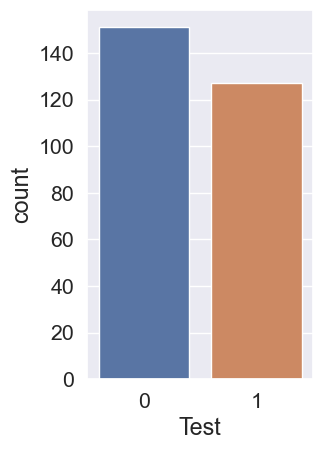

In [11]:
# loading test data
test_data=pd.read_csv('test_data.csv')
dataset.shape
test_feature_data= test_data[['rwcount', 'overlapMBRFirstDS', 'E_22' , 'avgLenY2', 'avgLenX2', 'rwcount2',
                       'avgMBRArea2',  'E_2', 'avgLenY', 'avgLenX' ]]
X_test=test_feature_data.iloc[:, :]
y_test=test_data.iloc[:, -1]
print(y_test.shape)
lis = [ 'Test']
for i,j in enumerate([y_test]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j);
    plt.xlabel(lis[i])

(3404, 10)
SCORE: 0.6402877697841727
F1 SCORE: 0.582879739016154
[[146   5]
 [ 95  32]]


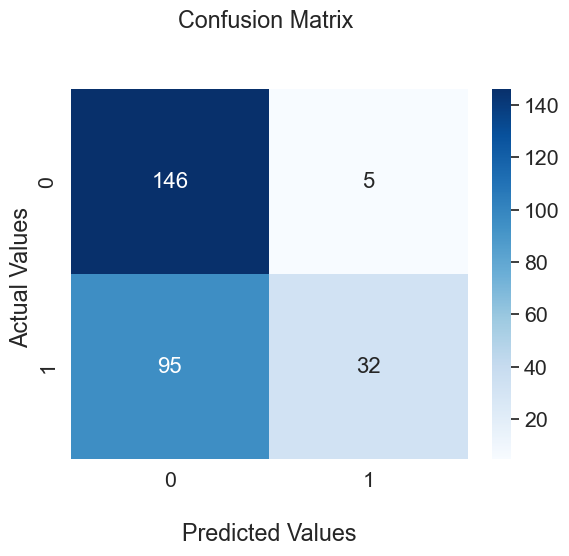

In [12]:
clf=xgb.XGBClassifier(
                    n_estimators =180, max_depth = 10, gamma = 1.0217029910430822,
                    reg_alpha = 57.0,min_child_weight=6.0,reg_lambda=0.6641321068560448,
                    colsample_bytree=0.6383196155287385, )
evaluation = [( X_train, y_train), ( X_test, y_test)]
clf.fit(X_train,y_train,verbose=False)
print(X.shape)

pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred>0.5)
print ("Accuracy using XGB boost:", accuracy)
print ("F1 SCORE:", f1_score(y_test, pred, average='weighted'))

cm = confusion_matrix(y_test,pred)
print(cm)
sns.set(font_scale=1.4)
ax = sns.heatmap(cm, annot=True, cmap='Blues',annot_kws={"size": 16},fmt='g')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [13]:
# getting best features for XGB
rfecv = RFECV(estimator=xgb.XGBClassifier(
                    n_estimators =180, max_depth = 10, gamma = 1.0217029910430822,
                    reg_alpha = 57.0,min_child_weight=6.0,reg_lambda=0.6641321068560448,
                    colsample_bytree=0.6383196155287385, ), 
              step=1, 
              cv=StratifiedKFold(10),
              scoring='accuracy')
rfecv.fit(X, y)

df_features = pd.DataFrame(columns = ['feature', 'support', 'ranking'])

for i in range(X.shape[1]):
    row = {'feature': i, 'support': rfecv.support_[i], 'ranking': rfecv.ranking_[i]}
    df_features = df_features.append(row, ignore_index=True)
    
df_features.sort_values(by='ranking').head(20)

C:\Users\Abrar Abir\AppData\Local\Temp\ipykernel_12788\2699367498.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\Abrar Abir\AppData\Local\Temp\ipykernel_12788\2699367498.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\Abrar Abir\AppData\Local\Temp\ipykernel_12788\2699367498.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\Abrar Abir\AppData\Local\Temp\ipykernel_12788\2699367498.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

,feature,support,ranking
3,3,True,1
4,4,True,1
7,7,True,1
8,8,True,1
9,9,True,1
0,0,False,2
5,5,False,3
6,6,False,4
2,2,False,5
1,1,False,6


In [35]:
df_features = pd.DataFrame(columns = ['feature', 'support', 'ranking'])

for i in range(X.shape[1]):
    row = {'feature': i, 'support': rfecv.support_[i], 'ranking': rfecv.ranking_[i]}
    df_features = df_features.append(row, ignore_index=True)
    
df_features.sort_values(by='ranking').head(20)

C:\Users\Abrar Abir\AppData\Local\Temp\ipykernel_6696\2182216319.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\Abrar Abir\AppData\Local\Temp\ipykernel_6696\2182216319.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\Abrar Abir\AppData\Local\Temp\ipykernel_6696\2182216319.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\Abrar Abir\AppData\Local\Temp\ipykernel_6696\2182216319.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fe

,feature,support,ranking
0,0,True,1
2,2,True,1
3,3,True,1
5,5,True,1
7,7,True,1
8,8,True,1
9,9,True,1
4,4,False,2
1,1,False,4
6,6,False,7


(5022, 10)
Accuracy using over sampling 0.7230215827338129
[[143   8]
 [ 69  58]]


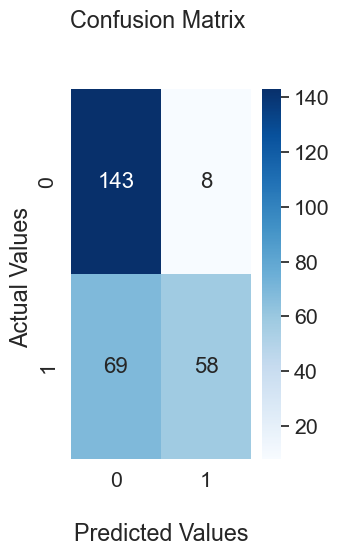

In [22]:
# Using oversampling and undersampling with random forest classifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score

sampling = RandomOverSampler(sampling_strategy='minority')
x_train_resample, y_resample = sampling.fit_resample(X, y)
print(x_train_resample.shape)
for i,j in enumerate([y_resample]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j);
    plt.xlabel('Training data')
classifier_rf = RandomForestClassifier(random_state=15, n_jobs=-1, max_depth=15,min_samples_leaf=10,min_samples_split=100,
                                       n_estimators=800, oob_score=True)
classifier_rf.fit(x_train_resample,y_resample)
# scr = cross_val_score(classifier_rf, x_train_resample, y_resample, cv=3, scoring='accuracy')
# print('Accuracy for 3 Fold: ', np.mean(scr))
# f1_score = cross_val_score(classifier_rf, x_train_resample, y_resample, cv=3, scoring='f1_macro')
# print('Macro f1 score for 3 fold: ', np.mean(f1_score))

y_pred=classifier_rf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy using over sampling with random forest: ',accuracy)
print(cm)
sns.set(font_scale=1.4)
ax = sns.heatmap(cm, annot=True, cmap='Blues',annot_kws={"size": 16},fmt='g')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

Accuracy using undersampling 0.7158273381294964
[[140  11]
 [ 68  59]]


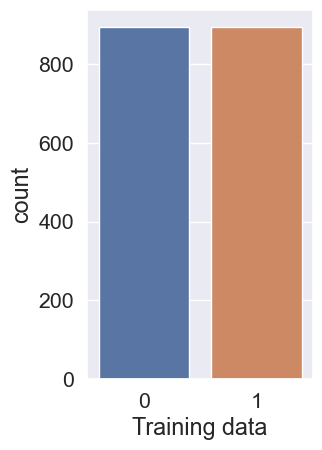

In [24]:
#under sampling
sampling = RandomUnderSampler(sampling_strategy='majority')
x_train_resample, y_resample = sampling.fit_resample(X, y)
classifier_rf = RandomForestClassifier(random_state=15, n_jobs=-1, max_depth=15,min_samples_leaf=10,min_samples_split=100,
                                       n_estimators=800, oob_score=True)
classifier_rf.fit(x_train_resample,y_resample)
for i,j in enumerate([y_resample]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j);
    plt.xlabel('Training data')

# scr = cross_val_score(classifier_rf, x_train_resample, y_resample, cv=3, scoring='accuracy')
# print('Accuracy for 3 Fold: ', np.mean(scr))
# f1_score = cross_val_score(classifier_rf, x_train_resample, y_resample, cv=3, scoring='f1_macro')
# print('Macro f1 score for 3 fold: ', np.mean(f1_score))

y_pred=classifier_rf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy using undersampling with random forest:',accuracy)
print(cm)